In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from IPython.display import Image
import matplotlib.pyplot as plt
from time import time

## Task 1

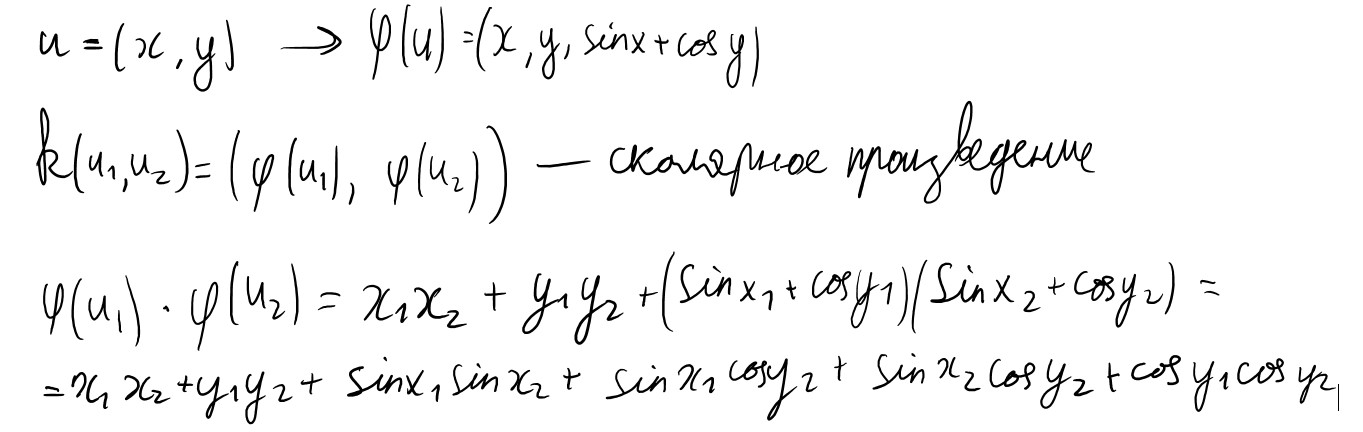

In [2]:
Image(filename='Task1.jpg')

## Task 2

При n = 5. Если нарисовать тетраэдр из точек класса 1, и поместить внутрь него точку класса 2, то не найдётся плоскости, отделяющей классы друг от друга. 
При этом, если n = 4 (и точки не лежат в одной плоскости), всегда найдётся плоскость, разделяющая классы.

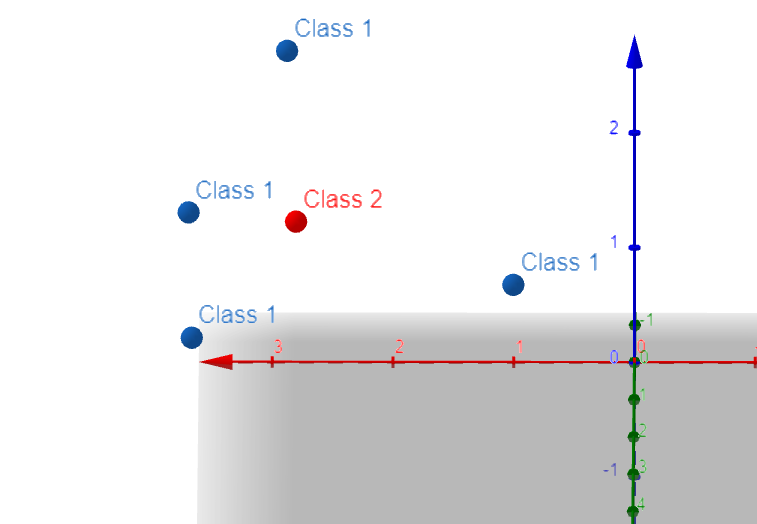

## Task 3

In [3]:
df = pd.read_csv("../Bonus19/BRCA_pam50.tsv", sep="\t", index_col=0)
df3 = df.loc[df["Subtype"].isin(["Luminal A","Luminal B"])]
X3 = df3.iloc[:, :-1].to_numpy()
y3 = df3["Subtype"].to_numpy()

In [4]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, stratify=y3, test_size=0.2, random_state=17
)

In [5]:
svm = SVC(kernel="linear", C=3.5)
svm.fit(X3_train, y3_train); pass

Balanced accuracy score: 0.8873949579831932
[[78  5]
 [ 7 30]]
TPR: 0.94 TNR: 0.811


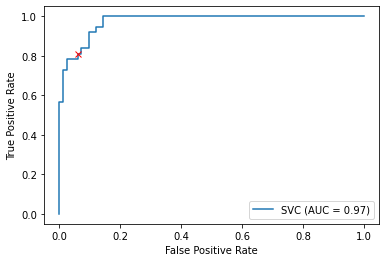

In [6]:
y3_pred = svm.predict(X3_test)
print("Balanced accuracy score:", balanced_accuracy_score(y3_pred, y3_test))
M = confusion_matrix(y3_test, y3_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(svm, X3_test, y3_test)
plt.plot(1 - TPR, TNR, "x", c="red")
plt.show()

In [7]:
coef = np.argsort(np.abs(svm.coef_[0]))[-5:]
df3 = df3.iloc[:, coef]
X3 = df3.iloc[:, :-1].to_numpy()
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, stratify=y3, test_size=0.2, random_state=17
)

In [8]:
svm = SVC(kernel="linear", C=3.5)
svm.fit(X3_train, y3_train); pass

Balanced accuracy score: 0.7395786642761093
[[76  7]
 [21 16]]
TPR: 0.916 TNR: 0.432


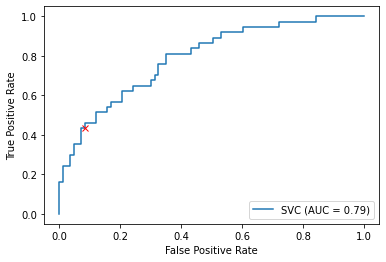

In [9]:
y3_pred = svm.predict(X3_test)
print("Balanced accuracy score:", balanced_accuracy_score(y3_pred, y3_test))
M = confusion_matrix(y3_test, y3_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(svm, X3_test, y3_test)
plt.plot(1 - TPR, TNR, "x", c="red")
plt.show()

## Task 4

In [10]:
X4_pca = PCA(n_components=2).fit_transform(df.iloc[:, :-1].to_numpy())
X4 = df.iloc[:, :-1].to_numpy()
y4 = df["Subtype"].to_numpy()
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, stratify=y4, test_size=0.2, random_state=17
)
X4_pca_train, X4_pca_test, y4_train, y4_test = train_test_split(
    X4_pca, y4, stratify=y4, test_size=0.2, random_state=17
)

In [11]:
svm = SVC(kernel="linear", C=3.5)
svm.fit(X4_train, y4_train); pass
y4_pred = svm.predict(X4_test)
print("Balanced accuracy score:", balanced_accuracy_score(y4_pred, y4_test))
M = confusion_matrix(y4_test, y4_pred)
print(M)

Balanced accuracy score: 0.9533868092691622
[[12  0  1  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  0 80  2  0  0]
 [ 0  0  5 32  0  0]
 [ 0  1  2  0  0  1]
 [ 0  0  0  0  0 27]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [12]:
svm = SVC(kernel="linear", C=3.5)
svm.fit(X4_pca_train, y4_train); pass
y4_pred = svm.predict(X4_pca_test)
print("Balanced accuracy score:", balanced_accuracy_score(y4_pred, y4_test))
M = confusion_matrix(y4_test, y4_pred)
print(M)

Balanced accuracy score: 0.8545343545343546
[[ 7  0  0  6  0  0]
 [ 0 17  3  0  0  0]
 [ 1  0 75  6  0  0]
 [ 2  0 11 24  0  0]
 [ 1  0  2  0  1  0]
 [ 0  0  0  0  0 27]]


## Task 5

In [13]:
X1_1 = np.random.multivariate_normal([0,0], [[1, 1], [1, 1]], 10000)
X1_2 = np.random.multivariate_normal([10,10], [[1, 1], [1, 1]], 10000)
X1 = np.concatenate([X1_1, X1_2])
y1 = np.concatenate([["0"]*10000, ["1"]*10000])

X2_1 = np.random.multivariate_normal([0,0], [[1, 1], [1, 1]], 10000)
X2_2 = np.random.multivariate_normal([0,0], [[1, 1], [1, 1]], 10000)
X2 = np.concatenate([X2_1, X2_2])
y2 = np.concatenate([["0"]*10000, ["1"]*10000])

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, stratify=y1, test_size=0.2, random_state=17
)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=17
)

In [15]:
svm = SVC(kernel="linear", C=3.5)
time_start = time()
svm.fit(X1_train, y1_train); pass
time_stop = time()
print("Time:", time_stop - time_start)
y1_pred = svm.predict(X1_test)
print("Balanced accuracy score:", balanced_accuracy_score(y1_pred, y1_test))
M = confusion_matrix(y1_test, y1_pred)
print(M)

Time: 0.016004562377929688
Balanced accuracy score: 1.0
[[2000    0]
 [   0 2000]]


In [16]:
time_start = time()
svm.fit(X2_train, y2_train); pass
time_stop = time()
print("Time:", time_stop - time_start)
y2_pred = svm.predict(X2_test)
print("Balanced accuracy score:", balanced_accuracy_score(y2_pred, y2_test))
M = confusion_matrix(y2_test, y2_pred)
print(M)

Time: 4.307581901550293
Balanced accuracy score: 0.4879797940337708
[[1017  983]
 [1065  935]]
